In [101]:
from pathlib import Path
from dlfp.common import get_repo_root
ONEMARK_COLLATED_DIR = get_repo_root() / "evaluations/0512-om4/collated"
CHARMARK_COLLATED_DIR = get_repo_root() / "evaluations/ch3/collated"

In [102]:
%matplotlib inline
import json
import itertools
from typing import NamedTuple
import numpy as np
import matplotlib.pyplot as plt 
from matplotlib.axes import Axes
from matplotlib.figure import Figure

class Figurable(NamedTuple):
    
    title: str
    train_loss: list[float]
    valid_loss: list[float]
    
    @staticmethod
    def from_file(file: Path, title_map: dict[str, str] = None) -> 'Figurable':
        title_map = title_map or {}
        losses = json.loads(file.read_text())
        title = losses.get('title', file.stem)
        title = title_map.get(title, title)
        return Figurable(title, losses['train'], losses['valid'])


class Arrangeable(NamedTuple):
    
    figurables: np.ndarray
    ylim: tuple[float, float] = None
        

def plot_epochs_curves(arrangeable: Arrangeable, fig_sz_factor_x: float = 2.25, fig_sz_factor_y: float = 2.0):
    arrangement = np.array(arrangeable.figurables, dtype=object)
    print(arrangement.shape)
    if arrangement.ndim == 1:
        arrangement = arrangement.reshape(1, -1)
    assert arrangement.ndim == 2, f"arrangement has shape {arrangement.shape}; must be 2D"
    rows, cols = arrangement.shape
    fig, ax_array = plt.subplots(rows, cols, figsize=(cols * fig_sz_factor_x, rows * fig_sz_factor_y))
    fig: Figure
    # fig.tight_layout()
    ax_array = ax_array.reshape(rows, cols)
    for r, c in itertools.product(range(rows), range(cols)):
        print("plotting", r, c)
        ax: Axes = ax_array[r,c]
        f: Figurable = arrangement[r,c]
        ax.set_title(f.title)
        ax.set_xlabel("Epoch")
        first = r == 0 and c == 0
        if first:
            ax.set_ylabel("Cross-Entropy Loss")
        if c > 0:
            ax.get_yaxis().set_visible(False)
        if arrangeable.ylim:
            ax.set_ylim(*arrangeable.ylim)
        epochs = list(range(max(len(f.train_loss), len(f.valid_loss))))
        generator_loss, discriminator_loss = np.array(f.train_loss), np.array(f.valid_loss)
        ax.plot(epochs, generator_loss, label=f"Train")
        ax.plot(epochs, discriminator_loss, label=f"Valid")
        if first:
            ax.legend()
    plt.show()



(1, 3)
plotting 0 0
plotting 0 1
plotting 0 2


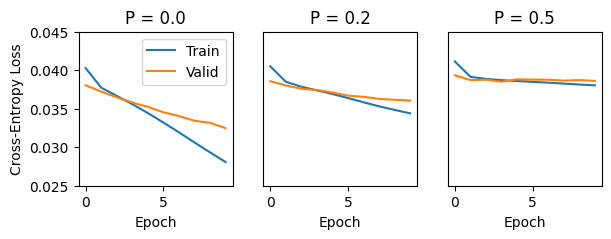

In [103]:
def plot_onemark_dropout():
    filenames = [
        "1-onemark-tdr0.0-losses.json",
        # "6-onemark-default-losses.json", 
        "7-onemark-tdr0.2-losses.json",
        "2-onemark-tdr0.5-losses.json",
    ]
    title_map = {
        "onemark-tdr0.0": "P = 0.0",
        "onemark-default": "P = 0.1",
        "onemark-tdr0.2": "P = 0.2",
        "onemark-tdr0.5": "P = 0.5",
    }
    arrangement_figs = [
        [Figurable.from_file(ONEMARK_COLLATED_DIR / filename, title_map=title_map) for filename in filenames]
    ]
    figurables = np.full(shape=(1, len(filenames)), fill_value=None, dtype=object)
    figurables[:,:] = arrangement_figs
    arrangeable = Arrangeable(figurables, ylim=(0.025, 0.045))
    plot_epochs_curves(arrangeable)

plot_onemark_dropout()

(1, 2)
plotting 0 0
plotting 0 1


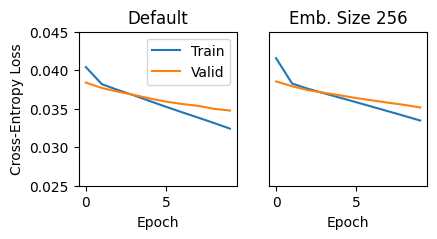

In [104]:
def plot_onemark_default_and_embsize():
    filenames = [
        "6-onemark-default-losses.json", 
        "0-onemark-embsize256-losses.json",
    ]
    title_map = {
        "onemark-default": "Default",
        "onemark-embsize256": "Emb. Size 256",
    }
    arrangement_figs = [
        [Figurable.from_file(ONEMARK_COLLATED_DIR / filename, title_map=title_map) for filename in filenames]
    ]
    figurables = np.full(shape=(1, len(filenames)), fill_value=None, dtype=object)
    figurables[:,:] = arrangement_figs
    arrangeable = Arrangeable(figurables, ylim=(0.025, 0.045))
    plot_epochs_curves(arrangeable)

plot_onemark_default_and_embsize()

(1, 2)
plotting 0 0
plotting 0 1


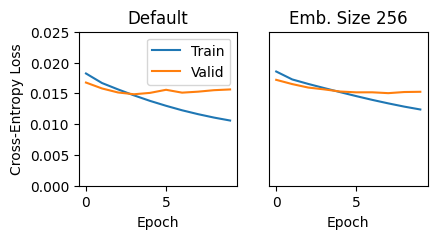

In [105]:
def plot_charmark_default_and_embsize():
    filenames = [
        "1-charmark-default-losses.json", 
        "3-charmark-embsize256-losses.json",
    ]
    title_map = {
        "charmark-default": "Default",
        "charmark-embsize256": "Emb. Size 256",
    }
    arrangement_figs = [
        [Figurable.from_file(CHARMARK_COLLATED_DIR / filename, title_map=title_map) for filename in filenames]
    ]
    figurables = np.full(shape=(1, len(filenames)), fill_value=None, dtype=object)
    figurables[:,:] = arrangement_figs
    arrangeable = Arrangeable(figurables, ylim=(0.0, 0.025))
    plot_epochs_curves(arrangeable)

plot_charmark_default_and_embsize()

(1, 3)
plotting 0 0
plotting 0 1
plotting 0 2


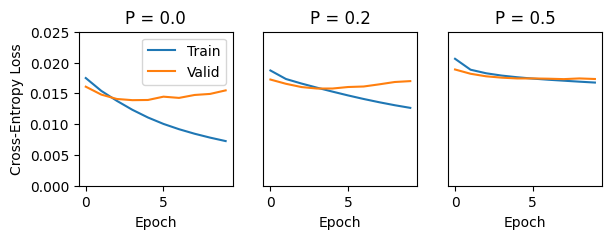

In [109]:
def plot_charmark_dropout():
    filenames = [
        "9-charmark-tdr0.0-losses.json",
        "10-charmark-tdr0.2-losses.json",
        "0-charmark-tdr0.5-losses.json",
    ]
    title_map = {
        "charmark-tdr0.0": "P = 0.0",
        "charmark-tdr0.2": "P = 0.2",
        "charmark-tdr0.5": "P = 0.5",
    }
    arrangement_figs = [
        [Figurable.from_file(CHARMARK_COLLATED_DIR / filename, title_map=title_map) for filename in filenames]
    ]
    figurables = np.full(shape=(1, len(filenames)), fill_value=None, dtype=object)
    figurables[:,:] = arrangement_figs
    arrangeable = Arrangeable(figurables, ylim=(0.0, 0.025))
    plot_epochs_curves(arrangeable)

plot_charmark_dropout()